# Reinforcement Learning

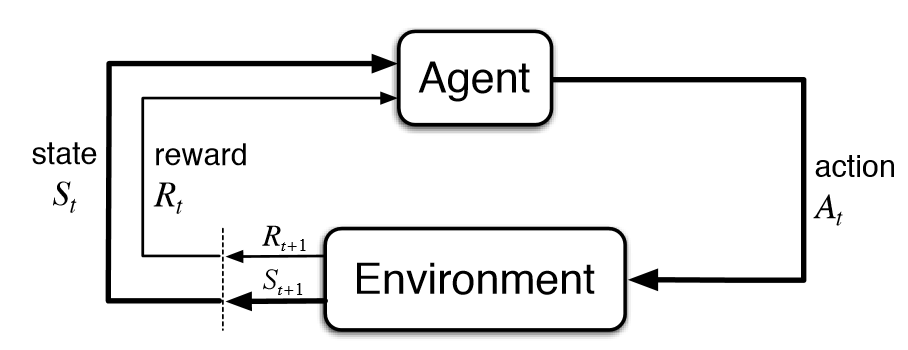

## Demo 1: Simple Gridworld Problem (4x4 Grid)

<b>Demo Description:</b> A simple gridworld problem is defined, where the agent can take actions to move up, down, left, or right. The gridworld contains rewards of 1 for a goal state, -1 for a penalty state, and 0 for regular states. The agent randomly selects actions and transitions through the gridworld.

In [6]:
import numpy as np

# Define the gridworld
gridworld = np.array([
    [0, 0, 0, 1],
    [0, 1, 0, -1],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [7]:
# Define actions (0: up, 1: right, 2: down, 3: left)
actions = [0, 1, 2, 3]

In [8]:
# Define state transition function
def transition(state, action):
    i, j = state

    if gridworld[i, j] in [1, -1]:
        return (i, j), gridworld[i, j]

    if action == 0:  # Up
        next_state = (max(i-1, 0), j)
    elif action == 1:  # Right
        next_state = (i, min(j+1, gridworld.shape[1]-1))
    elif action == 2:  # Down
        next_state = (min(i+1, gridworld.shape[0]-1), j)
    elif action == 3:  # Left
        next_state = (i, max(j-1, 0))

    reward = gridworld[next_state[0], next_state[1]]
    return next_state, reward

In [15]:
# Demo: Simulate an agent in the gridworld
start_state = (0, 0)
current_state = start_state

for _ in range(5):
    action = np.random.choice(actions)
    next_state, reward = transition(current_state, action)
    print(f"Action: {action}, Next State: {next_state}, Reward: {reward}")
    current_state = next_state

Action: 1, Next State: (0, 1), Reward: 0
Action: 1, Next State: (0, 2), Reward: 0
Action: 3, Next State: (0, 1), Reward: 0
Action: 0, Next State: (0, 1), Reward: 0
Action: 0, Next State: (0, 1), Reward: 0


## Demo 2: Simulated Environment for a Basic RL Task

<b>Demo Description: </b>In Demo 2, a basic environment with states 'A', 'B', and 'C' is defined. The agent can take actions 'Left' or 'Right'. The transition function provides the next state and associated reward based on the current state and action. For state 'B', transitions and rewards are randomly determined. The agent takes random actions and experiences the environment.

In [16]:
import random

# Define a simple environment with states and actions
states = ['A', 'B', 'C']
actions = ['Left', 'Right']

# Define a transition function (in this case, a simple deterministic function)
def transition(state, action):
    if state == 'A':
        if action == 'Left':
            return 'C', -1
        else:  # Action is 'Right'
            return 'B', 1
    elif state == 'B':
        return random.choice(states), random.randint(-3, 3)  # Random transition and reward for state 'B'
    elif state == 'C':
        return 'A', 10  # Deterministic transition and reward for state 'C'

# Demo: Simulate an agent in the environment
current_state = random.choice(states)

for _ in range(5):
    action = random.choice(actions)
    next_state, reward = transition(current_state, action)
    print(f"Action: {action}, Next State: {next_state}, Reward: {reward}")
    current_state = next_state


Action: Right, Next State: A, Reward: 10
Action: Left, Next State: C, Reward: -1
Action: Right, Next State: A, Reward: 10
Action: Left, Next State: C, Reward: -1
Action: Right, Next State: A, Reward: 10


## DEMO 3: Q-LEARNING

<b>Demo description: </b>In this demo, we have a 4x4 gridworld with a goal state (reward = 1), obstacles (reward = -1), and regular states (reward = 0). The agent uses Q-Learning to learn the optimal policy to reach the goal while avoiding obstacles. The Q-values are updated based on the rewards received during interactions with the environment.

Note that this is a simplified example for demonstration purposes. In practice, more complex environments and additional techniques may be required for real-world applications.

In [18]:
import numpy as np

# Define the gridworld
gridworld = np.array([
    [0, 0, 0, 1],
    [0, -1, 0, -1],
    [0, 0, 0, 0],
    [-1, 0, 0, 0]
])

# Define actions (0: up, 1: right, 2: down, 3: left)
actions = [0, 1, 2, 3]

# Define Q-values table
num_states = gridworld.size
num_actions = len(actions)
q_table = np.zeros((num_states, num_actions))

# Define hyperparameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
num_episodes = 1000

# Q-Learning algorithm
for _ in range(num_episodes):
    state = np.random.randint(num_states)
    done = False

    while not done:
        if np.random.rand() < exploration_prob:
            action = np.random.choice(actions)  # Exploration
        else:
            action = np.argmax(q_table[state])  # Exploitation

        next_state = np.unravel_index(np.argmax(gridworld), gridworld.shape)

        reward = gridworld[next_state]
        q_table[state, action] += learning_rate * (reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action])

        state = np.ravel_multi_index(next_state, gridworld.shape)

        if reward == 1 or reward == -1:
            done = True

# Print the learned Q-values
print("Learned Q-Values:")
print(q_table)

# Test the learned policy
current_state = np.unravel_index(np.argmax(gridworld), gridworld.shape)

while True:
    action = np.argmax(q_table[np.ravel_multi_index(current_state, gridworld.shape)])
    next_state = list(current_state)
    if action == 0:  # Up
        next_state[0] = max(current_state[0] - 1, 0)
    elif action == 1:  # Right
        next_state[1] = min(current_state[1] + 1, gridworld.shape[1] - 1)
    elif action == 2:  # Down
        next_state[0] = min(current_state[0] + 1, gridworld.shape[0] - 1)
    elif action == 3:  # Left
        next_state[1] = max(current_state[1] - 1, 0)

    current_state = tuple(next_state)

    print(f"Action: {action}, Next State: {current_state}")

    if gridworld[current_state] == 1:
        print("Goal reached!")
        break
    elif gridworld[current_state] == -1:
        print("Obstacle encountered!")
        break


Learned Q-Values:
[[3.72111616 3.606335   4.50791695 3.69254605]
 [4.50791874 0.992      3.806015   4.42968251]
 [4.50791861 4.366002   0.99968    2.8720128 ]
 [4.50791807 0.8        0.8        3.798335  ]
 [1.568      4.36759944 2.7516928  4.50790151]
 [4.50791874 1.99168    0.9984     0.96      ]
 [4.09836956 0.9984     4.50791803 0.8       ]
 [4.50791833 3.798335   3.798335   3.806015  ]
 [0.96       0.96       4.50789971 0.9984    ]
 [4.50790179 3.798335   3.806015   0.        ]
 [1.7597568  0.         4.359602   4.50782879]
 [4.18713561 3.798335   4.50790187 1.6       ]
 [4.49733068 2.5520128  0.999936   1.6       ]
 [3.1617655  4.50787382 0.8        2.9823488 ]
 [4.50791807 0.8        0.8        3.766335  ]
 [4.50791833 2.15168    0.96       4.004671  ]]
Action: 0, Next State: (0, 3)
Goal reached!


<b>Advanced DEMO: </b>Python + PyTorch + Pygame Reinforcement Learning – Train an AI to Play Snake (https://www.youtube.com/watch?v=L8ypSXwyBds)